# Thesis - Regression Analysis 

Objective: To analyze the internal cv and external validation results from the regression experiments (nested only).

In [1]:
import os 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import stats

In [2]:
sns.set_context('paper')
sns.set_style('ticks')

## Data

In [2]:
data = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/regression/Table. Results - Regression.csv'
df = pd.read_csv(data)
df.head()

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
0,eGeMAPS,SVM,6.05,0.27,4.75,5.03,5.21,4.79
1,eGeMAPS,Random Forest,6.21,0.23,5.69,5.67,5.02,4.91
2,eGeMAPS,Linear Regression,6.65,0.43,38.39,6.55,6.14,5.00
3,eGeMAPS,ElasticNet,6.56,0.22,14.75,6.05,5.19,4.44
4,eGeMAPS,XGBoost,6.39,0.16,7.37,7.33,5.53,5.66


In [3]:
df['feature_set'].value_counts()

feature_set
eGeMAPS    6
LFTK       6
BoAW       6
wav2vec    6
BERT       6
Name: count, dtype: int64

In [4]:
df['model'].value_counts()

model
SVM                      5
Random Forest            5
Linear Regression        5
ElasticNet               5
XGBoost                  5
Multilayer Perceptron    5
Name: count, dtype: int64

## Internal Cross-Validation

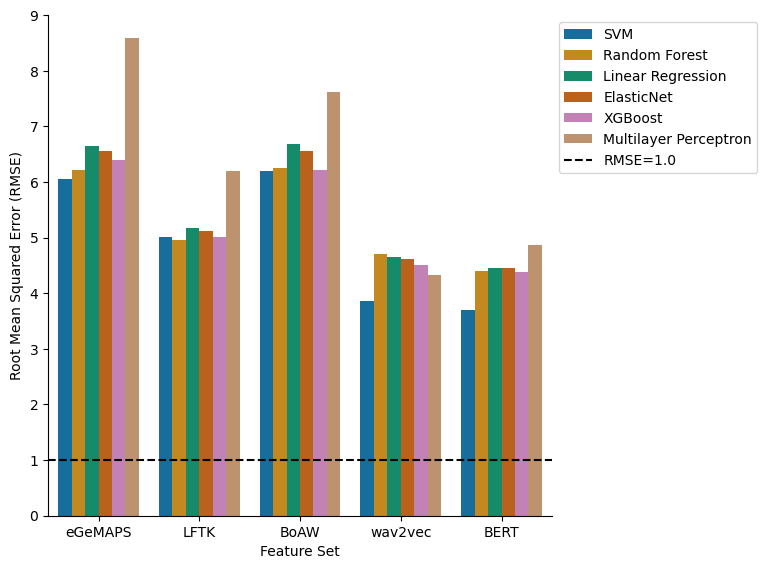

In [5]:
fig = plt.figure(figsize=(6.5,6.5))
# fig.suptitle("Internal Cross-Validation Performance")

plt.ylim(0.0,9.0)
plt.xlabel("Feature Set")
plt.ylabel("Root Mean Squared Error (RMSE)")

g = sns.barplot(
    data=df, x="feature_set", y="cv_english", hue="model",
    errorbar="sd", palette="colorblind"
)
g.axhline(y=1.0, color='black', linestyle='--', label='RMSE=1.0')
g.legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1), title="")
sns.despine()

output_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/regression'
output_file = os.path.join(output_dir, 'reg_cv.png')
fig.savefig(output_file, dpi=300, bbox_inches='tight')

In [6]:
model = df.groupby('model')['cv_english'].describe()
model

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
ElasticNet,5.0,5.462,1.031756,4.46,4.61,5.12,6.56,6.56
Linear Regression,5.0,5.520,1.077822,4.45,4.65,5.17,6.65,6.68
Multilayer Perceptron,5.0,6.322,1.797212,4.33,4.87,6.20,7.62,8.59
Random Forest,5.0,5.306,0.870362,4.40,4.71,4.95,6.21,6.26
SVM,5.0,4.968,1.173103,3.70,3.87,5.02,6.05,6.20
XGBoost,5.0,5.302,0.946927,4.39,4.50,5.01,6.22,6.39


In [7]:
for m in model.index:
    print("%.2f (%.2f)" % (model.loc[m, 'mean'], model.loc[m, 'std']), m)

5.46 (1.03) ElasticNet
5.52 (1.08) Linear Regression
6.32 (1.80) Multilayer Perceptron
5.31 (0.87) Random Forest
4.97 (1.17) SVM
5.30 (0.95) XGBoost


In [8]:
feature = df.groupby('feature_set')['cv_english'].describe()
feature

,count,mean,std,min,25%,50%,75%,max
feature_set,,,,,,,,
BERT,6.0,4.378333,0.377964,3.70,4.3925,4.425,4.4575,4.87
BoAW,6.0,6.590000,0.541812,6.20,6.2300,6.410,6.6500,7.62
LFTK,6.0,5.245000,0.474584,4.95,5.0125,5.070,5.1575,6.20
eGeMAPS,6.0,6.741667,0.931932,6.05,6.2550,6.475,6.6275,8.59
wav2vec,6.0,4.445000,0.311881,3.87,4.3725,4.555,4.6400,4.71


In [9]:
for f in feature.index:
    print("%.2f (%.2f)" % (feature.loc[f, 'mean'], feature.loc[f, 'std']), f)

4.38 (0.38) BERT
6.59 (0.54) BoAW
5.24 (0.47) LFTK
6.74 (0.93) eGeMAPS
4.45 (0.31) wav2vec


## External Validation

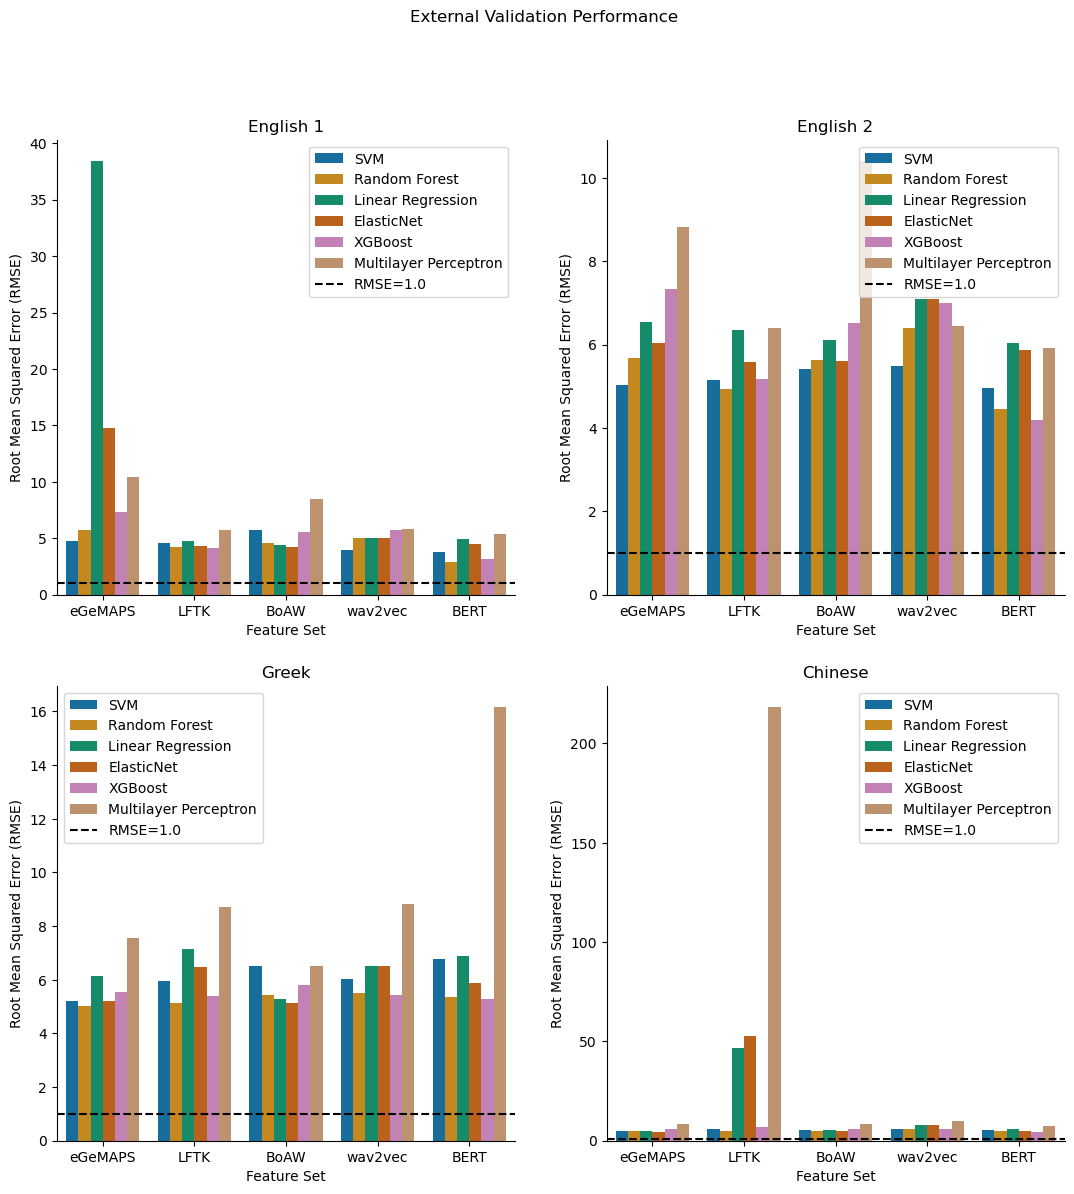

In [10]:
ev_set = {
    'ev_chinese': 'Chinese',
    'ev_greek': 'Greek',
    'ev_english_2': 'English 2', 
    'ev_english_1': 'English 1',
}
ev_set_keys = list(ev_set.keys())

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(13, 13)
fig.suptitle("External Validation Performance")

# temp_df = df[~df['model'].isin(['Linear Regression', 'Multilayer Perceptron', 'ElasticNet'])]
for i in range(2):
    for j in range(2):
        ev = ev_set_keys.pop()
        g = sns.barplot(
            data=df, x="feature_set", y=ev, hue="model",
            errorbar="sd", palette="colorblind", ax=axs[i,j]
        )
        # axs[i,j].set_ylim(0.0,9.0)
        axs[i,j].set_title(ev_set[ev])
        axs[i,j].set_xlabel("Feature Set")
        axs[i,j].set_ylabel("Root Mean Squared Error (RMSE)")
        axs[i,j].axhline(y=1.0, color='black', linestyle='--', label='RMSE=1.0')
        axs[i,j].legend()
        sns.despine()

output_file = os.path.join(output_dir, 'reg_ev.png')
fig.savefig(output_file, dpi=500, bbox_inches='tight')

**Visualization without the outliers**

In [11]:
# IQR outlier removal
df_temp = df.copy(deep=True)
for ev in ['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']:
    Q1 = df_temp[ev].quantile(0.25)
    Q3 = df_temp[ev].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df_temp = df_temp[(df_temp[ev] >= lower_bound) & (df_temp[ev] <= upper_bound)]
df_temp

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
0,eGeMAPS,SVM,6.05,0.27,4.75,5.03,5.21,4.79
1,eGeMAPS,Random Forest,6.21,0.23,5.69,5.67,5.02,4.91
4,eGeMAPS,XGBoost,6.39,0.16,7.37,7.33,5.53,5.66
6,LFTK,SVM,5.02,0.46,4.54,5.16,5.94,5.92
7,LFTK,Random Forest,4.95,0.27,4.23,4.93,5.14,5.05
10,LFTK,XGBoost,5.01,0.23,4.18,5.17,5.39,6.98
12,BoAW,SVM,6.20,0.39,5.69,5.42,6.50,5.46
13,BoAW,Random Forest,6.26,0.37,4.57,5.63,5.43,5.03
14,BoAW,Linear Regression,6.68,0.38,4.43,6.11,5.30,5.27
15,BoAW,ElasticNet,6.56,0.28,4.24,5.60,5.14,4.96


In [62]:
# Z-score outlier removal
# df_temp = df.copy(deep=True)
# for ev in ['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']:
#     z_scores = np.abs(stats.zscore(df_temp[ev]))
#     df_temp = df_temp[z_scores < 3]
# df_temp

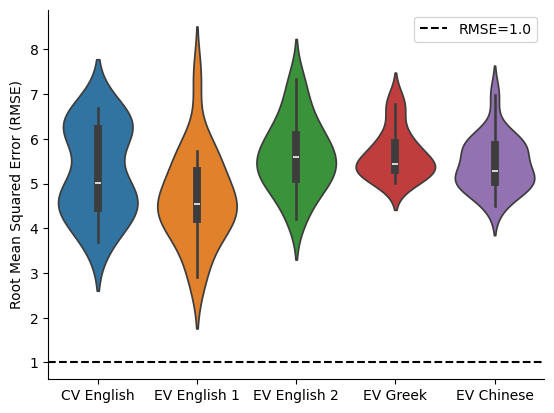

In [13]:
temp = df_temp[['cv_english', 'ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']]
temp = temp.rename(columns={
    'cv_english': 'CV English',
    'ev_english_1': 'EV English 1', 
    'ev_english_2': 'EV English 2', 
    'ev_greek': 'EV Greek', 
    'ev_chinese': 'EV Chinese'
})

sns.violinplot(temp)#, split=True, inner="quart")
# plt.ylim(0, 9)
# plt.suptitle('Internal Cross-Validation (CV) vs. External Validation (EV) Performance')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.axhline(y=1.0, color='black', linestyle='--', label='RMSE=1.0')
plt.legend()
sns.despine()

output_file = os.path.join(output_dir, 'reg_cv_ev.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

In [13]:
evs = ['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']

for ev in evs:
    print(ev)
    
    model = df.groupby('model')[ev].describe()
    for m in model.index:
        print("%.2f (%.2f)" % (model.loc[m, 'mean'], model.loc[m, 'std']), m)

ev_english_1
6.55 (4.59) ElasticNet
11.51 (15.03) Linear Regression
7.19 (2.18) Multilayer Perceptron
4.48 (1.04) Random Forest
4.54 (0.76) SVM
5.19 (1.61) XGBoost
ev_english_2
6.04 (0.62) ElasticNet
6.43 (0.42) Linear Regression
7.60 (1.93) Multilayer Perceptron
5.42 (0.75) Random Forest
5.21 (0.23) SVM
6.04 (1.32) XGBoost
ev_greek
5.84 (0.66) ElasticNet
6.39 (0.72) Linear Regression
9.55 (3.80) Multilayer Perceptron
5.29 (0.21) Random Forest
6.09 (0.60) SVM
5.49 (0.20) XGBoost
ev_chinese
15.01 (21.12) ElasticNet
14.13 (18.28) Linear Regression
50.44 (93.76) Multilayer Perceptron
5.19 (0.37) Random Forest
5.46 (0.48) SVM
5.83 (0.89) XGBoost


In [14]:
for ev in evs:
    print(ev)
    
    feature = df.groupby('feature_set')[ev].describe()
    for f in feature.index:
        print("%.2f (%.2f)" % (feature.loc[f, 'mean'], feature.loc[f, 'std']), f)

ev_english_1
4.11 (1.01) BERT
5.49 (1.58) BoAW
4.63 (0.60) LFTK
13.56 (12.69) eGeMAPS
5.10 (0.68) wav2vec
ev_english_2
5.25 (0.81) BERT
6.61 (1.90) BoAW
5.60 (0.64) LFTK
6.58 (1.35) eGeMAPS
6.59 (0.62) wav2vec
ev_greek
7.72 (4.18) BERT
5.79 (0.61) BoAW
6.47 (1.32) LFTK
5.78 (0.96) eGeMAPS
6.47 (1.24) wav2vec
ev_chinese
5.52 (1.07) BERT
5.81 (1.25) BoAW
55.93 (82.34) LFTK
5.53 (1.46) eGeMAPS
7.25 (1.59) wav2vec


## Best Features and Models

In [15]:
df.groupby('feature_set')['cv_english'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
feature_set,,,,,,,,
BERT,6.0,4.378333,0.377964,3.70,4.3925,4.425,4.4575,4.87
wav2vec,6.0,4.445000,0.311881,3.87,4.3725,4.555,4.6400,4.71
LFTK,6.0,5.245000,0.474584,4.95,5.0125,5.070,5.1575,6.20
BoAW,6.0,6.590000,0.541812,6.20,6.2300,6.410,6.6500,7.62
eGeMAPS,6.0,6.741667,0.931932,6.05,6.2550,6.475,6.6275,8.59


Rank: BERT, wav2vec, LFTK, BoAW, eGeMAPS.

1. eGeMAPS ranked last, after BoAW
2. The best scores still have errors > 4.0 MMSE, which is pretty high.

In [16]:
df.groupby('model')['cv_english'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
SVM,5.0,4.968,1.173103,3.70,3.87,5.02,6.05,6.20
XGBoost,5.0,5.302,0.946927,4.39,4.50,5.01,6.22,6.39
Random Forest,5.0,5.306,0.870362,4.40,4.71,4.95,6.21,6.26
ElasticNet,5.0,5.462,1.031756,4.46,4.61,5.12,6.56,6.56
Linear Regression,5.0,5.520,1.077822,4.45,4.65,5.17,6.65,6.68
Multilayer Perceptron,5.0,6.322,1.797212,4.33,4.87,6.20,7.62,8.59


Rank: SVM, XGBoost, Random Forest, ElasticNet, Linear Regression, MLP.

1. SVM, XGB, RF "retained" their performance (compared to the classification problem).
2. MLP performed worst, even worse than Elastic Net and Linear Regression. Why is that?

## Interesting things about the ranking of features and models ...

Least performing feature sets 

In [17]:
df[df['feature_set']=='eGeMAPS']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
0,eGeMAPS,SVM,6.05,0.27,4.75,5.03,5.21,4.79
1,eGeMAPS,Random Forest,6.21,0.23,5.69,5.67,5.02,4.91
2,eGeMAPS,Linear Regression,6.65,0.43,38.39,6.55,6.14,5.00
3,eGeMAPS,ElasticNet,6.56,0.22,14.75,6.05,5.19,4.44
4,eGeMAPS,XGBoost,6.39,0.16,7.37,7.33,5.53,5.66
5,eGeMAPS,Multilayer Perceptron,8.59,0.83,10.42,8.83,7.57,8.39


In [18]:
df[df['feature_set']=='BoAW']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
12,BoAW,SVM,6.20,0.39,5.69,5.42,6.50,5.46
13,BoAW,Random Forest,6.26,0.37,4.57,5.63,5.43,5.03
14,BoAW,Linear Regression,6.68,0.38,4.43,6.11,5.30,5.27
15,BoAW,ElasticNet,6.56,0.28,4.24,5.60,5.14,4.96
16,BoAW,XGBoost,6.22,0.44,5.54,6.52,5.81,5.89
17,BoAW,Multilayer Perceptron,7.62,0.31,8.48,10.40,6.53,8.27


In [19]:
df[df['feature_set']=='LFTK']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
6,LFTK,SVM,5.02,0.46,4.54,5.16,5.94,5.92
7,LFTK,Random Forest,4.95,0.27,4.23,4.93,5.14,5.05
8,LFTK,Linear Regression,5.17,0.38,4.75,6.36,7.15,46.76
9,LFTK,ElasticNet,5.12,0.31,4.29,5.59,6.48,52.71
10,LFTK,XGBoost,5.01,0.23,4.18,5.17,5.39,6.98
11,LFTK,Multilayer Perceptron,6.20,0.53,5.77,6.40,8.70,218.15


Best performing

In [20]:
df[df['feature_set']=='BERT']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
24,BERT,SVM,3.70,0.41,3.77,4.96,6.77,5.21
25,BERT,Random Forest,4.40,0.40,2.90,4.46,5.36,5.11
26,BERT,Linear Regression,4.45,0.42,4.96,6.05,6.87,5.71
27,BERT,ElasticNet,4.46,0.52,4.45,5.88,5.87,5.05
28,BERT,XGBoost,4.39,0.49,3.14,4.20,5.30,4.50
29,BERT,Multilayer Perceptron,4.87,0.49,5.42,5.93,16.15,7.56


The performance is retained for SVM: 

CV 3.70 (+/-0.41), and the EV tests for English 1 (same language, same speech task). 

Performance dropped when the task changed, even with the same set of people, (English 2 RMSE=4.96).

The performance is worst when the language and speech tasks are different, even if the severity is similar: Probable AD.

Same as when the language, speech task, and cognitive health is different.

In [21]:
df[df['feature_set']=='wav2vec']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
18,wav2vec,SVM,3.87,0.35,3.95,5.49,6.04,5.92
19,wav2vec,Random Forest,4.71,0.28,5.02,6.40,5.52,5.84
20,wav2vec,Linear Regression,4.65,0.21,5.03,7.10,6.51,7.90
21,wav2vec,ElasticNet,4.61,0.19,5.03,7.09,6.50,7.89
22,wav2vec,XGBoost,4.50,0.39,5.72,7.00,5.42,6.11
23,wav2vec,Multilayer Perceptron,4.33,0.51,5.85,6.46,8.82,9.84


Same observations as the models. 

In general ...

In [22]:
df[['cv_english', 'ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']].describe()

,cv_english,ev_english_1,ev_english_2,ev_greek,ev_chinese
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.480000,6.577333,6.125667,6.443333,16.009333
std,1.161468,6.431757,1.241197,2.079863,39.782198
min,3.700000,2.900000,4.200000,5.020000,4.440000
25%,4.527500,4.325000,5.437500,5.367500,5.050000
50%,5.070000,4.990000,5.990000,5.905000,5.775000
75%,6.250000,5.712500,6.505000,6.525000,7.807500
max,8.590000,38.390000,10.400000,16.150000,218.150000


Median performance ...
- CV English       5.07
- EV English 1     4.99
- EV English 2     5.99
- EV Greek         5.91
- EV Chinese       5.78

CV, EEng1, EEng2, EChinese, EGreek

Max ... overfitting?
- 218 for EV chinese 
- 38 for EV english 1

Min ... very good performance 
- 2.9 EV English 1
- 4.2 EV English 2
- 5.02 EV Greek
- 4.4 EV Chinese

In [23]:
df.groupby('model')[['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']].mean().sort_values(by='ev_english_1')

,ev_english_1,ev_english_2,ev_greek,ev_chinese
model,,,,
Random Forest,4.482,5.418,5.294,5.188
SVM,4.540,5.212,6.092,5.460
XGBoost,5.190,6.044,5.490,5.828
ElasticNet,6.552,6.042,5.836,15.010
Multilayer Perceptron,7.188,7.604,9.554,50.442
Linear Regression,11.512,6.434,6.394,14.128


In [24]:
df.groupby('model')[['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']].mean().mean(axis=1).sort_values()

model
Random Forest             5.0955
SVM                       5.3260
XGBoost                   5.6380
ElasticNet                8.3600
Linear Regression         9.6170
Multilayer Perceptron    18.6970
dtype: float64

EV Ranking: Random Forest, SVM, XGBoost, ElasticNet, Linear Regression, MLP.

In [25]:
df.groupby('feature_set')[['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']].mean().sort_values(by='ev_english_1')

,ev_english_1,ev_english_2,ev_greek,ev_chinese
feature_set,,,,
BERT,4.106667,5.246667,7.720000,5.523333
LFTK,4.626667,5.601667,6.466667,55.928333
wav2vec,5.100000,6.590000,6.468333,7.250000
BoAW,5.491667,6.613333,5.785000,5.813333
eGeMAPS,13.561667,6.576667,5.776667,5.531667


In [26]:
df.groupby('feature_set')[['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']].mean().mean(axis=1).sort_values()

feature_set
BERT        5.649167
BoAW        5.925833
wav2vec     6.352083
eGeMAPS     7.861667
LFTK       18.155833
dtype: float64

EV Ranking: BERT, BoAW, wav2vec, eGeMAPS, LFTK.

Interestingly ... 

not surprisingly ... 

the interpretable features performed "worst" in the EV.

## Conclusion

1. For the best models, performance translates from CV to another when the language and speech tasks are the same.
2. MLP is not robust for external validation, perhaps it is overfitting the cross-validation set.
3. eGeMAPS is not robust for external validation, even for the case of CV.
4. BERT and wav2vec are most robust.
5. Best performing model:

(Linguistic)
- Hancrafted: LFTK + SCA + PCA + XGBoost
- Embeddings: BERT + SCA + PCA + SVM 

(Acoustic) 
- Handcrafted: eGeMAPS + SCA + PCA + SVM
- Embeddings: wav2vec + SCA + PCA + SVM
